<a href="https://colab.research.google.com/github/Shriharsh-Deshmukh/LPV/blob/main/2_Linear_regression_with_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import keras
from keras.models import Sequential
from keras.layers import Dense
import plotly.graph_objects as go

In [ ]:
# Load Boston Housing dataset from CMU
url = "https://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
# Create DataFrame with proper column names
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
data = pd.DataFrame(data, columns=feature_names)
data['PRICE'] = target

In [ ]:
# First look at the data
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Exploratory Data Analysis
print("First look at the data:")
print(data.head())
print("\nData shape:", data.shape)
print("\nNull values check:")
print(data.isnull().sum())
print("\nData statistics:")
print(data.describe())

First look at the data:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  

Data shape: (506, 14)

Null values check:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Data statistics:
             CRIM          ZN       INDUS        CHAS         NOX      

In [ ]:
# Data Visualization
sns.set(style="whitegrid")

<ipython-input-40-b5c7e0b2dc43>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PRICE'])


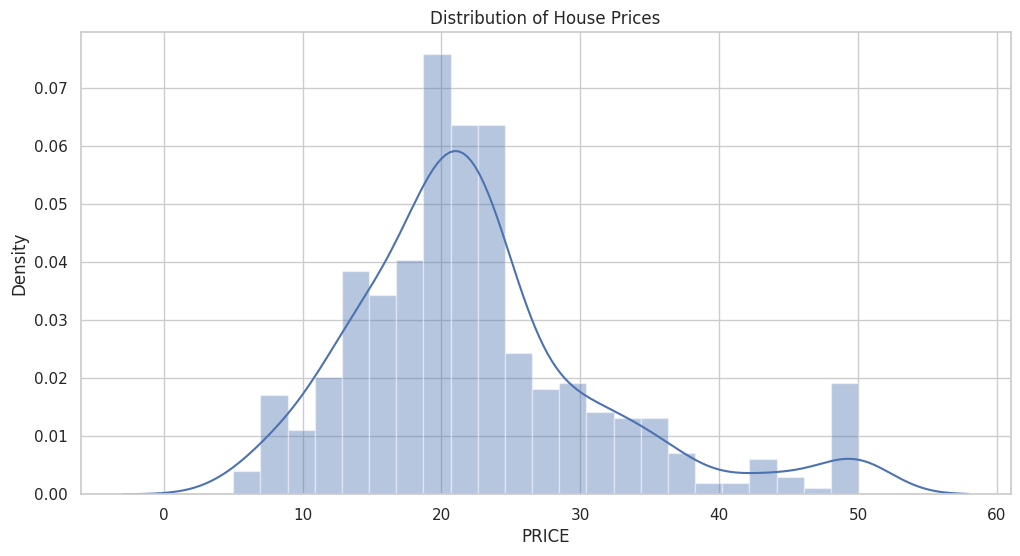

In [ ]:
# Distribution of target variable
plt.figure(figsize=(12, 6))
sns.distplot(data['PRICE'])
plt.title('Distribution of House Prices')
plt.show()

In [ ]:
# Looking at the data with names and target variable
data.head(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [ ]:
# Shape of the data
print(data.shape)

(506, 14)


In [ ]:
# Checking the null values in the dataset
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
# Checking the statistics of the data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


* This is sometimes very useful. For example, if you look at the CRIM column,
the max is 88.97 and 75% of the values are below 3.677083 while the mean is 3.613524.
* This suggests the max value is actually an outlier or there are outliers present in the column.

<ipython-input-45-97117d886cc7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.PRICE)


<Axes: xlabel='PRICE', ylabel='Density'>

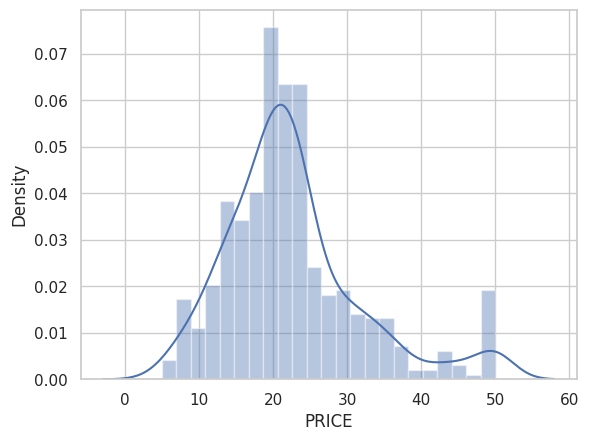

In [ ]:
# Checking the distribution of the target variable
import seaborn as sns
sns.distplot(data.PRICE)

* The distribution seems normal. If the data weren't normal, we would perform
log transformation or take the square root of the data to make it normal.
* Normal distribution is needed for machine learning for better model predictability.

<Axes: ylabel='PRICE'>

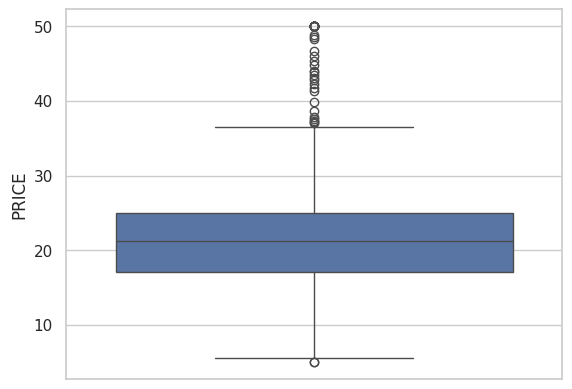

In [ ]:
# Distribution using box plot
sns.boxplot(data.PRICE)

* Checking the correlation of the independent features with the dependent feature
* Correlation is a statistical technique that can show whether and how strongly
pairs of variables are related. An intelligent correlation analysis can lead to
greater understanding of your data.

In [ ]:
# Checking correlation of the data
correlation = data.corr()
correlation.loc['PRICE']

,PRICE
CRIM,-0.388305
ZN,0.360445
INDUS,-0.483725
CHAS,0.175260
NOX,-0.427321
RM,0.695360
AGE,-0.376955
DIS,0.249929
RAD,-0.381626
TAX,-0.468536


<Axes: >

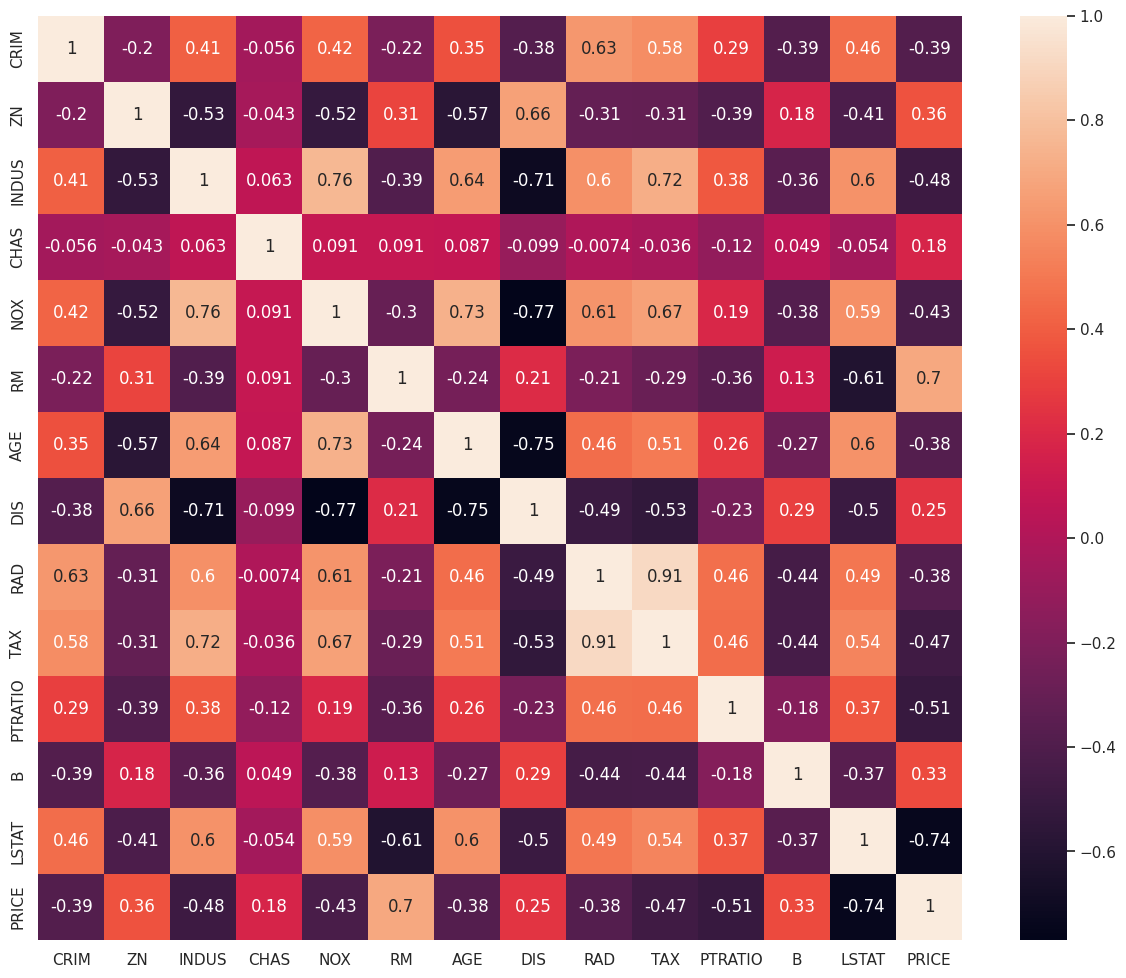

In [ ]:
# Plotting the heatmap
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(15, 12))
sns.heatmap(correlation, square=True, annot=True)

* By looking at the correlation plot, LSTAT is negatively correlated (-0.75),
* RM is positively correlated to the price, and PTRATIO is negatively correlated (-0.51).

In [ ]:
# Checking the scatter plot with the most correlated features
plt.figure(figsize=(20, 5))
features = ['LSTAT', 'RM', 'PTRATIO']

<Figure size 2000x500 with 0 Axes>

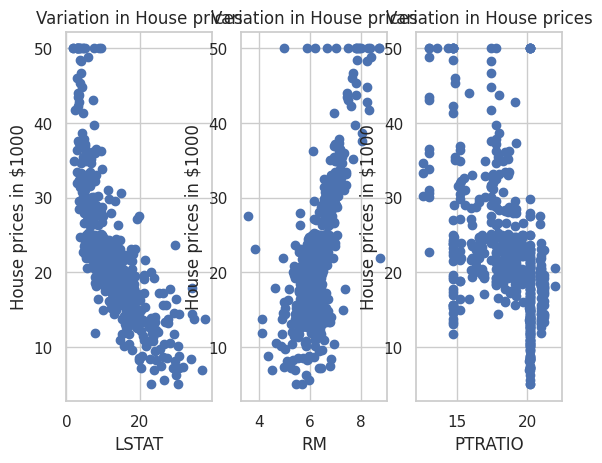

In [ ]:
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = data[col]
    y = data.PRICE
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('House prices in $1000')

In [ ]:
# Splitting the dependent feature and independent feature
# X = data[['LSTAT','RM','PTRATIO']]
X = data.iloc[:, :-1]
y = data.PRICE

In [ ]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Normalizing the data
* In order to provide standardized input to our neural network, we need to perform normalization.
* This reduces differences in scale that may arise from the existing features.
* We perform this normalization by subtracting the mean and dividing by the standard deviation.
* This normalization should only be performed using the mean and standard deviation from the training set
to avoid information leakage from the test set.

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
# Fitting the model
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Model Evaluation
# Prediction on the test dataset
y_pred = regressor.predict(X_test)

In [ ]:
# Calculating RMSE for the test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

4.928602182665336
0.668759493535632


In [ ]:
# Neural Networks
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* Due to the small amount of data in this dataset, we must be careful not to create
an overly complex model which could lead to overfitting. We'll use an architecture
with two Dense layers (128 and 64 neurons) with ReLU activation functions.
* A dense layer with linear activation will be used as output layer.
* We'll use mean squared error loss function and mean absolute error metric.

In [ ]:
# Creating the neural network model
import keras
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* Install visualization packages (commented out as they may not work in all environments)
* !pip install ann_visualizer
* !pip install graphviz
* from ann_visualizer.visualize import ann_viz
ann_viz(model, title="DEMO ANN")

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 612.2541 - mae: 22.9559 - val_loss: 490.2928 - val_mae: 20.6507
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 526.9242 - mae: 21.0746 - val_loss: 403.8664 - val_mae: 18.5225
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 425.1307 - mae: 18.5517 - val_loss: 233.2309 - val_mae: 13.4165
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 239.2796 - mae: 12.7537 - val_loss: 65.9573 - val_mae: 5.3298
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 74.8509 - mae: 6.7883 - val_loss: 62.2399 - val_mae: 5.1432
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 59.4741 - mae: 5.9109 - val_loss: 65.5731 - val_mae: 4.9642
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 31.8033 - mae: 4.3718 - val_loss: 59.5439 - val_mae: 5.1551
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 28.1673 - mae: 3.8397 - val_loss: 57.9668 - val_mae: 5.0630
Epoch 9/100
12/12 ━━━━━━━━━━━━━

In [ ]:
# Plotting training history
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'], name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'], name='Valid'))
fig.update_layout(height=500, width=700, xaxis_title='Epoch', yaxis_title='Loss')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'], name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_mae'], name='Valid'))
fig.update_layout(height=500, width=700, xaxis_title='Epoch', yaxis_title='Mean Absolute Error')
fig.show()

In [ ]:
# Evaluation of the model
y_pred = model.predict(X_test)
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.9082 - mae: 1.9996 
Mean squared error on test data:  10.387788772583008
Mean absolute error on test data:  2.1340041160583496


In [ ]:
# Comparison with traditional approaches
# First let's try with a simple algorithm, the Linear Regression:
from sklearn.metrics import mean_absolute_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)

Mean squared error on test data:  24.291119474973517
Mean absolute error on test data:  3.1890919658878483


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8583491890982056


In [ ]:
# Calculating RMSE for the test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

3.2230094401282945


In [ ]:
# Make predictions on new data
import sklearn
new_data = sklearn.preprocessing.StandardScaler().fit_transform(([[0.1, 10.0, 5.0, 0, 0.4, 6.0, 50, 6.0, 1, 400, 20, 300, 10]]))
prediction = model.predict(new_data)
print("Predicted house price:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted house price: [[10.183688]]
